In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix ,recall_score ,precision_score,r2_score
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import confusion_matrix


#models

from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.svm import SVC , SVR
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset =  pd.read_csv("Telecom_Churn_DataSet.csv")
dataset.head(7)

,CAID,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,daycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,CHURN
0,1001,128,1,2,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1002,107,1,2,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,1003,137,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1004,84,2,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1005,75,2,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1006,118,2,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,1007,121,1,2,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [3]:
#Here we need to predict numbercustomerservicecalls  that is catogory and none of colum has object type we can scale data using standardscaller 
dataset.dtypes

CAID                            int64
accountlength                   int64
internationalplan               int64
voicemailplan                   int64
numbervmailmessages             int64
totaldayminutes               float64
daycalls                        int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
CHURN                           int64
dtype: object

In [4]:


# # Print the indices of predicted outliers
# print("Indices of predicted outliers:", outliers)

In [5]:
## the dataset contain more number of outliers\

In [6]:
dataset.head()

,CAID,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,daycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,CHURN
0,1001,128,1,2,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1002,107,1,2,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,1003,137,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1004,84,2,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1005,75,2,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
len(dataset)

3922

## EDA 

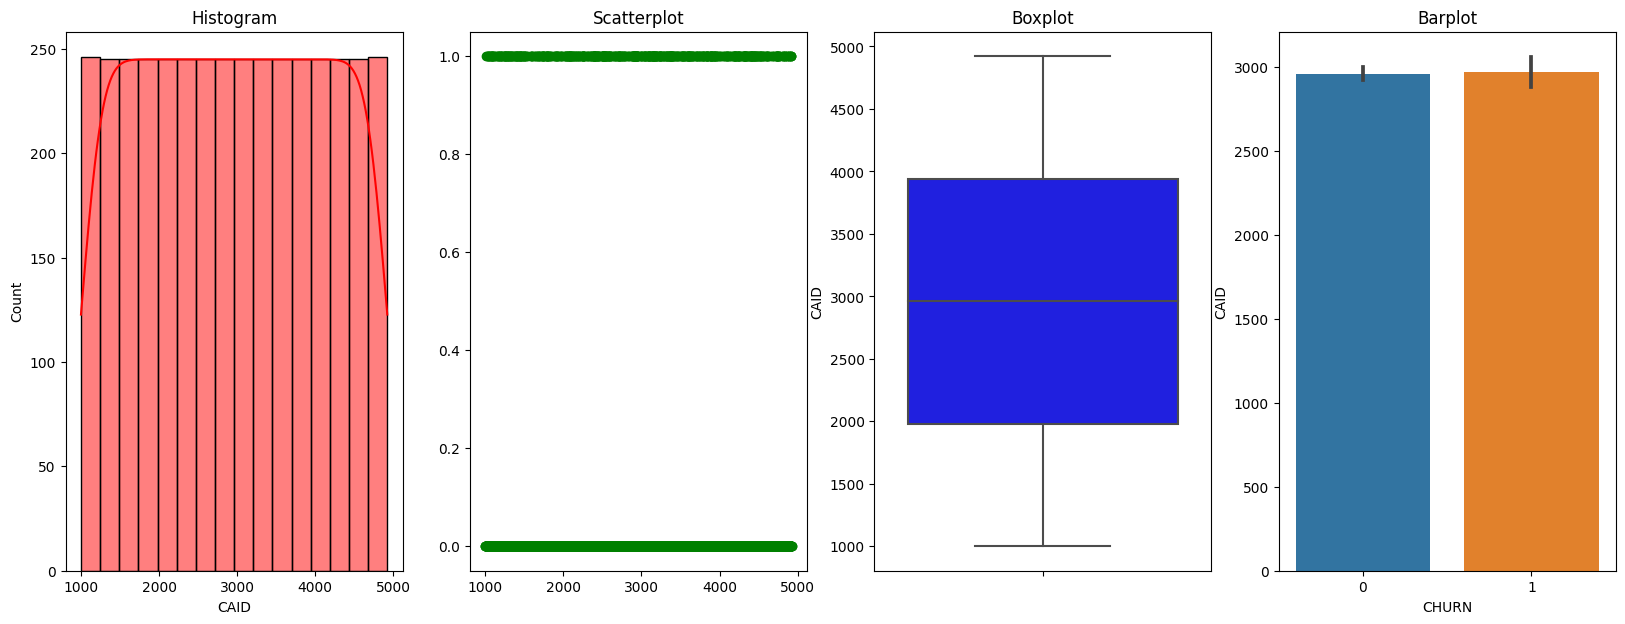

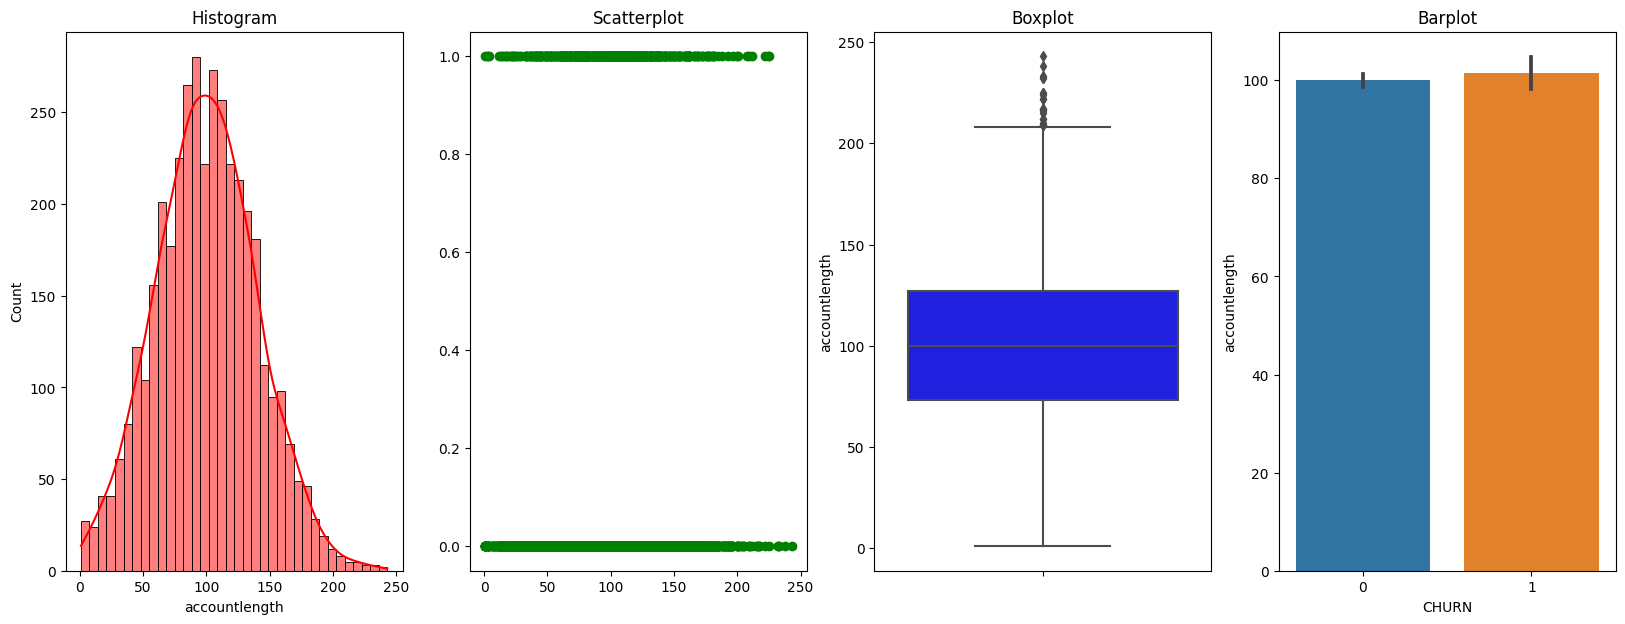

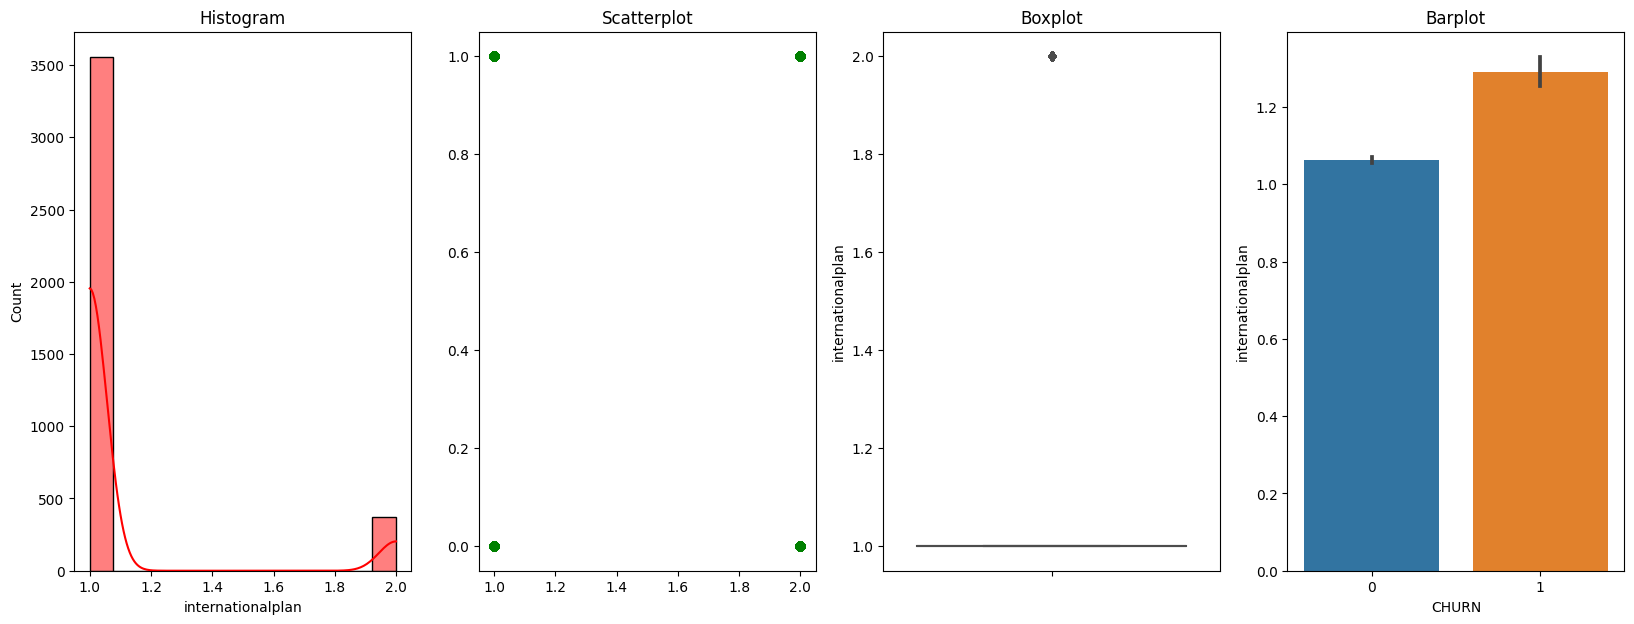

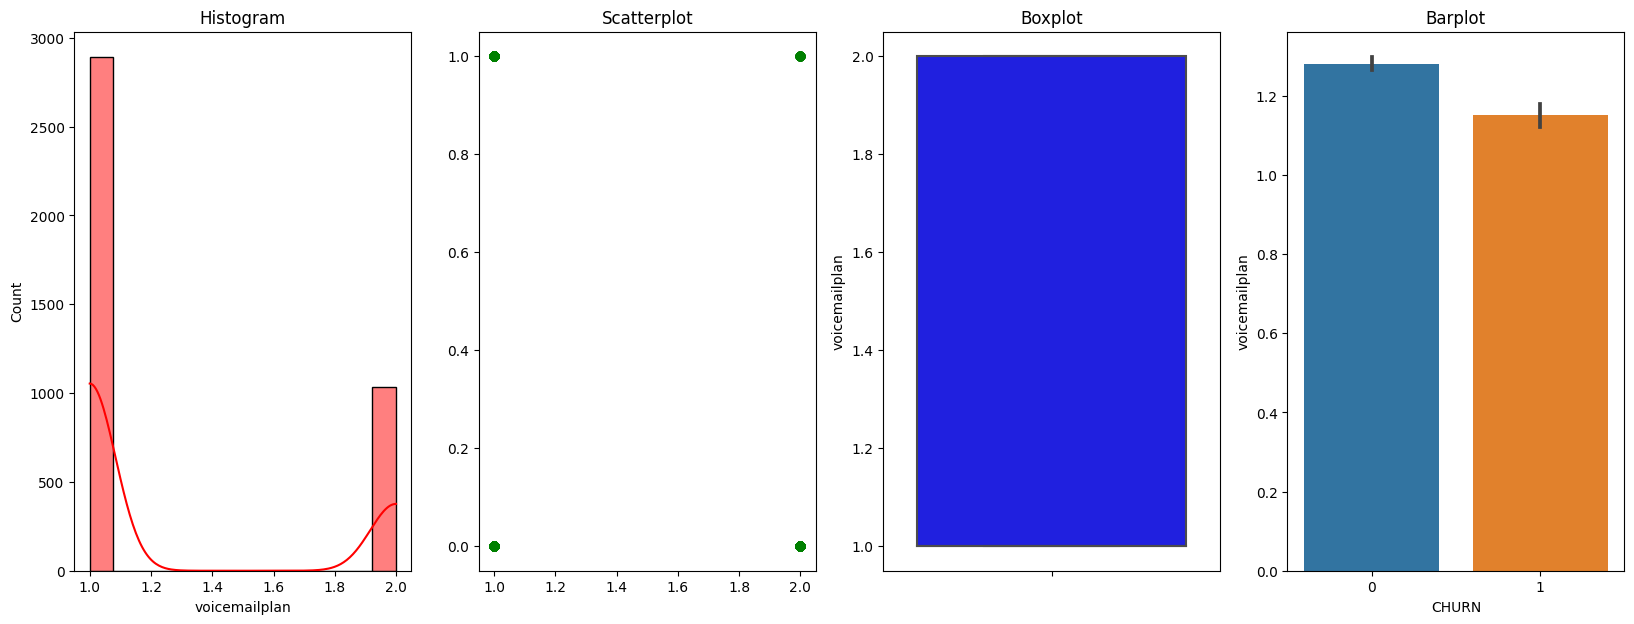

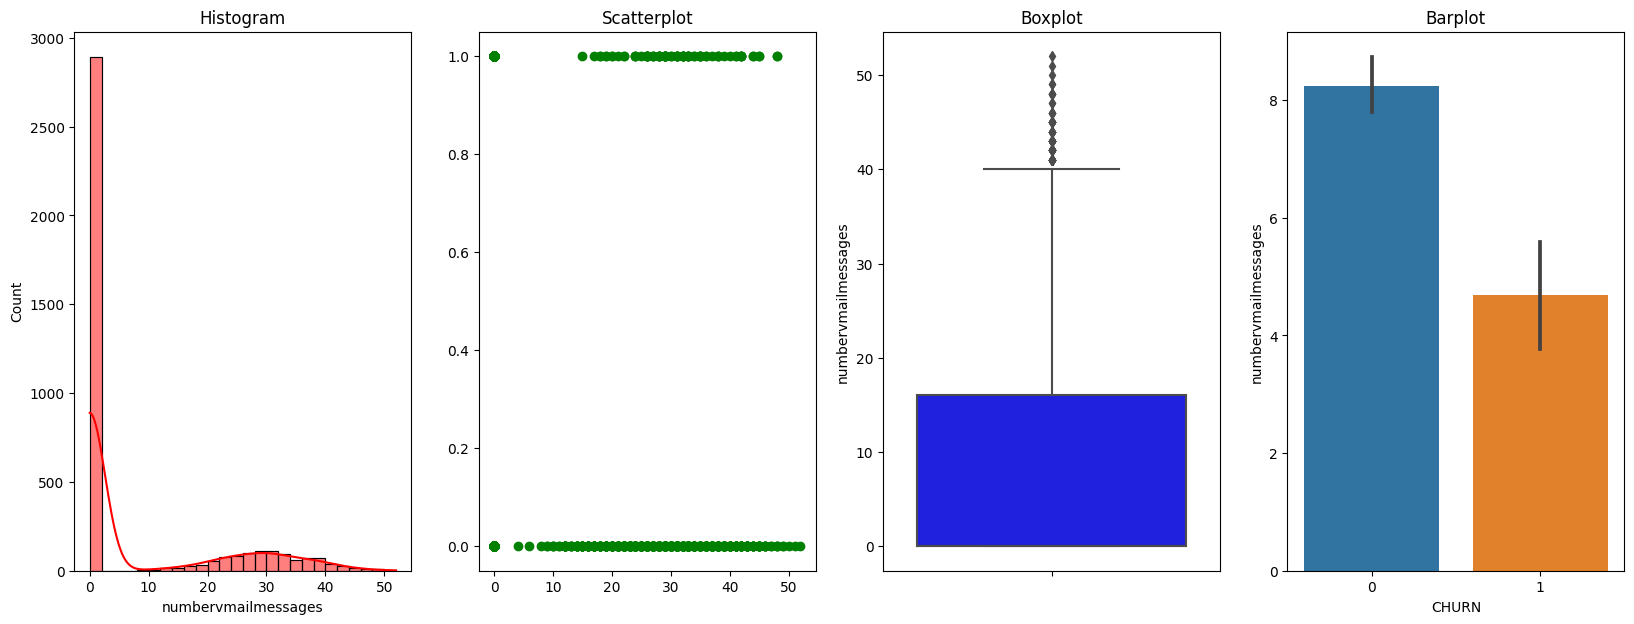

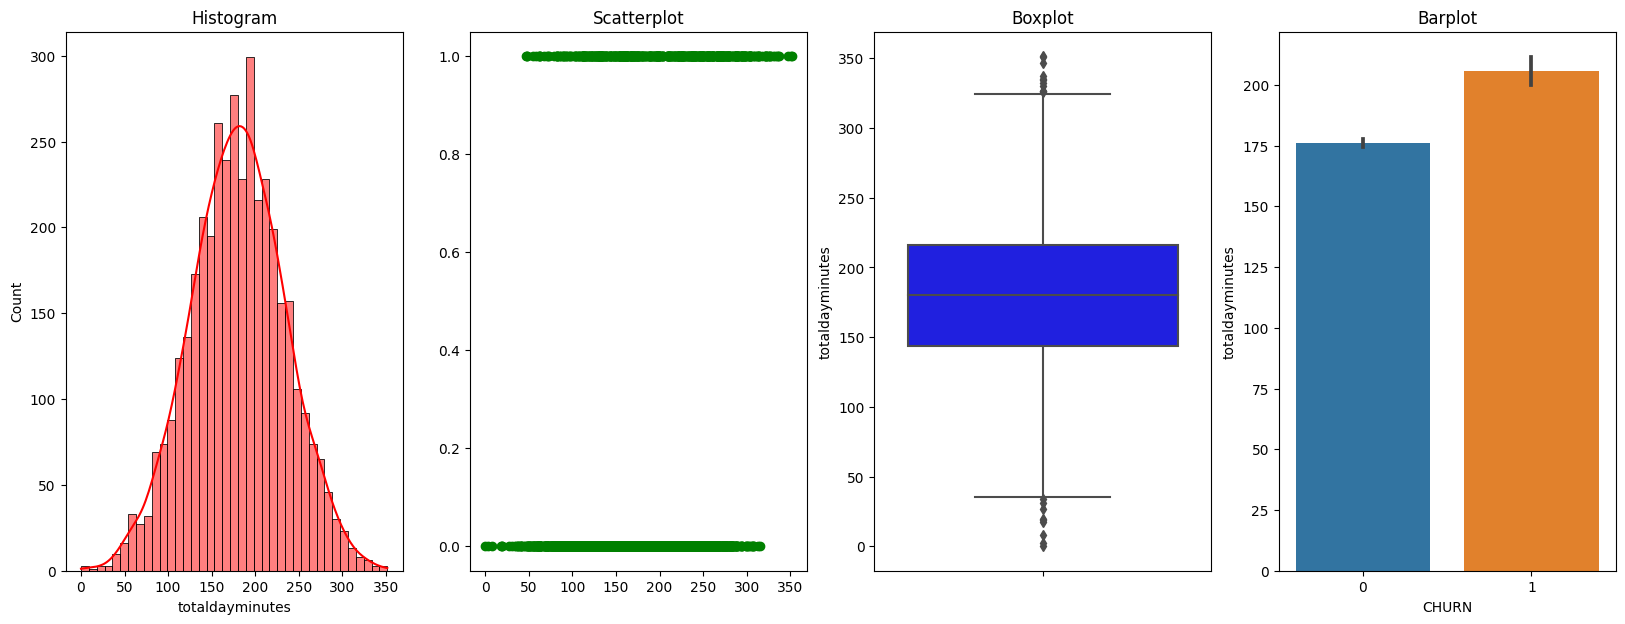

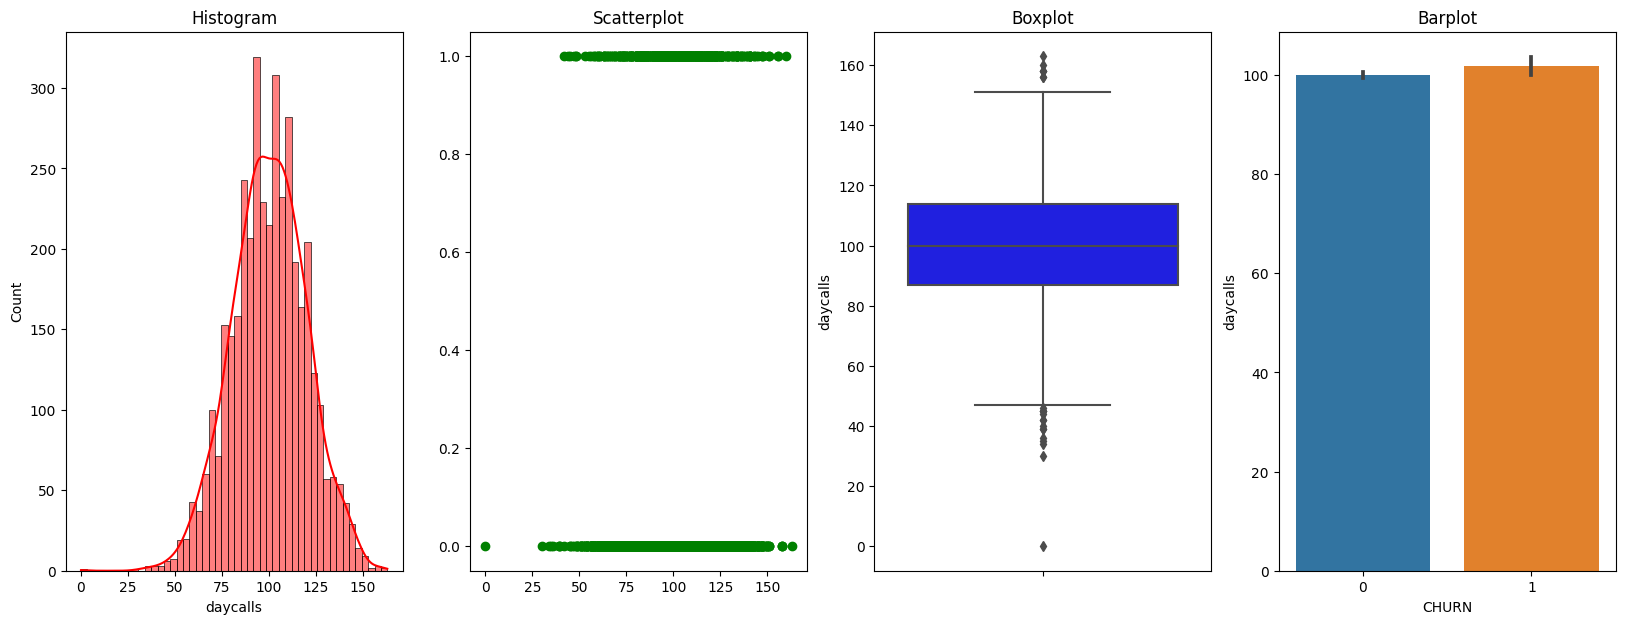

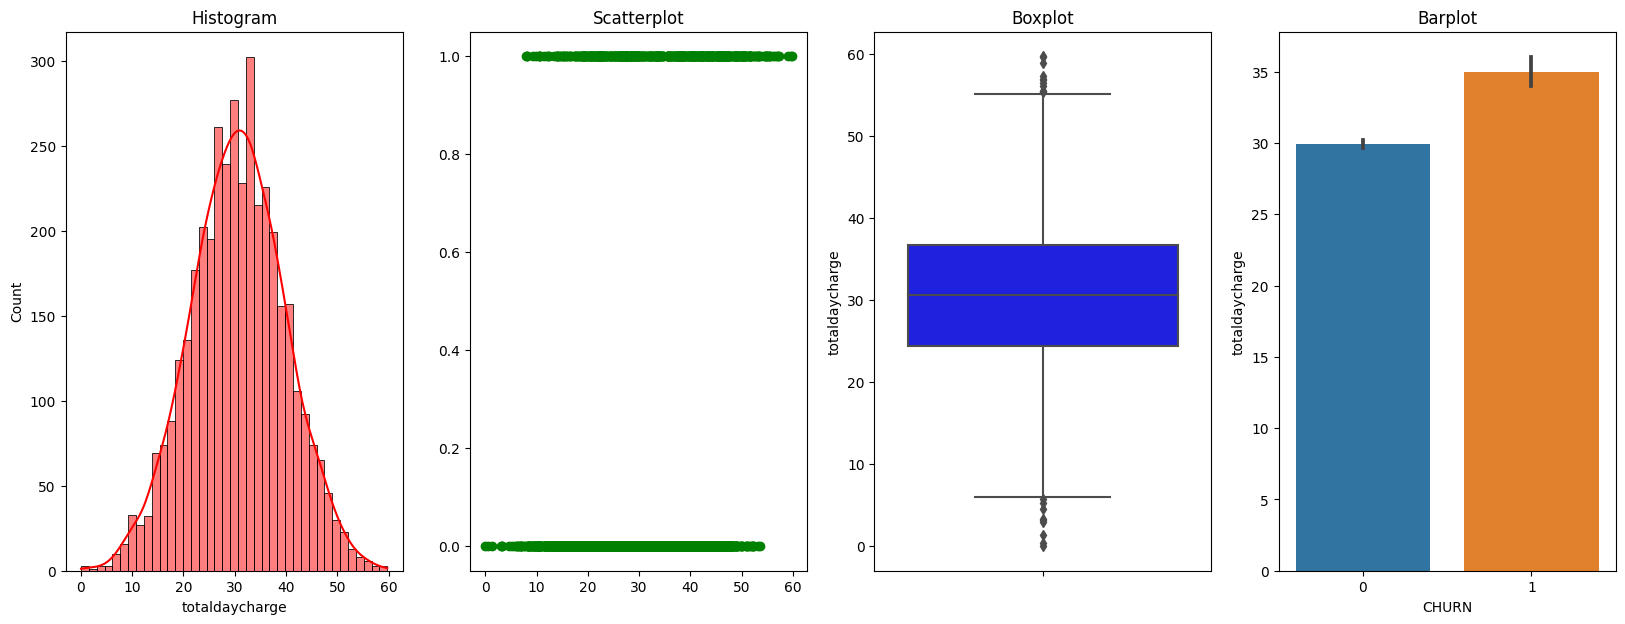

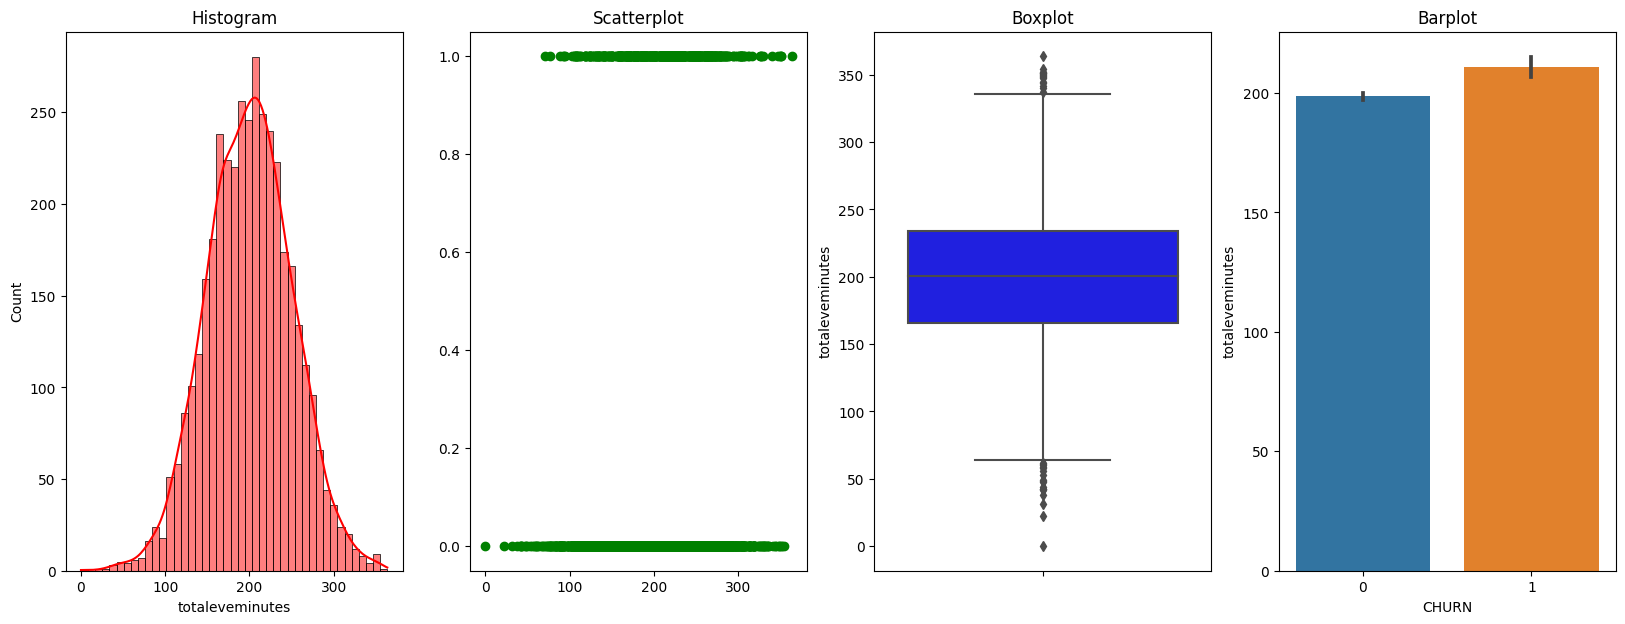

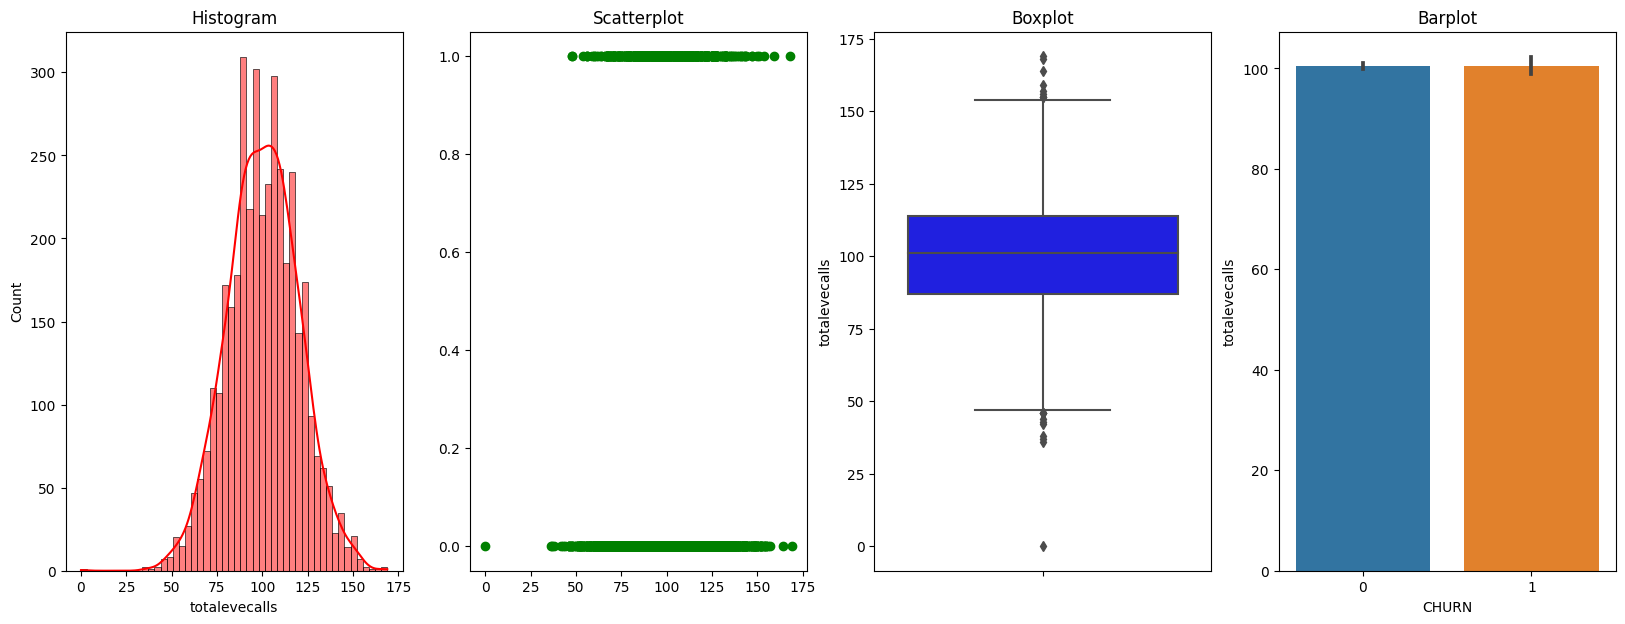

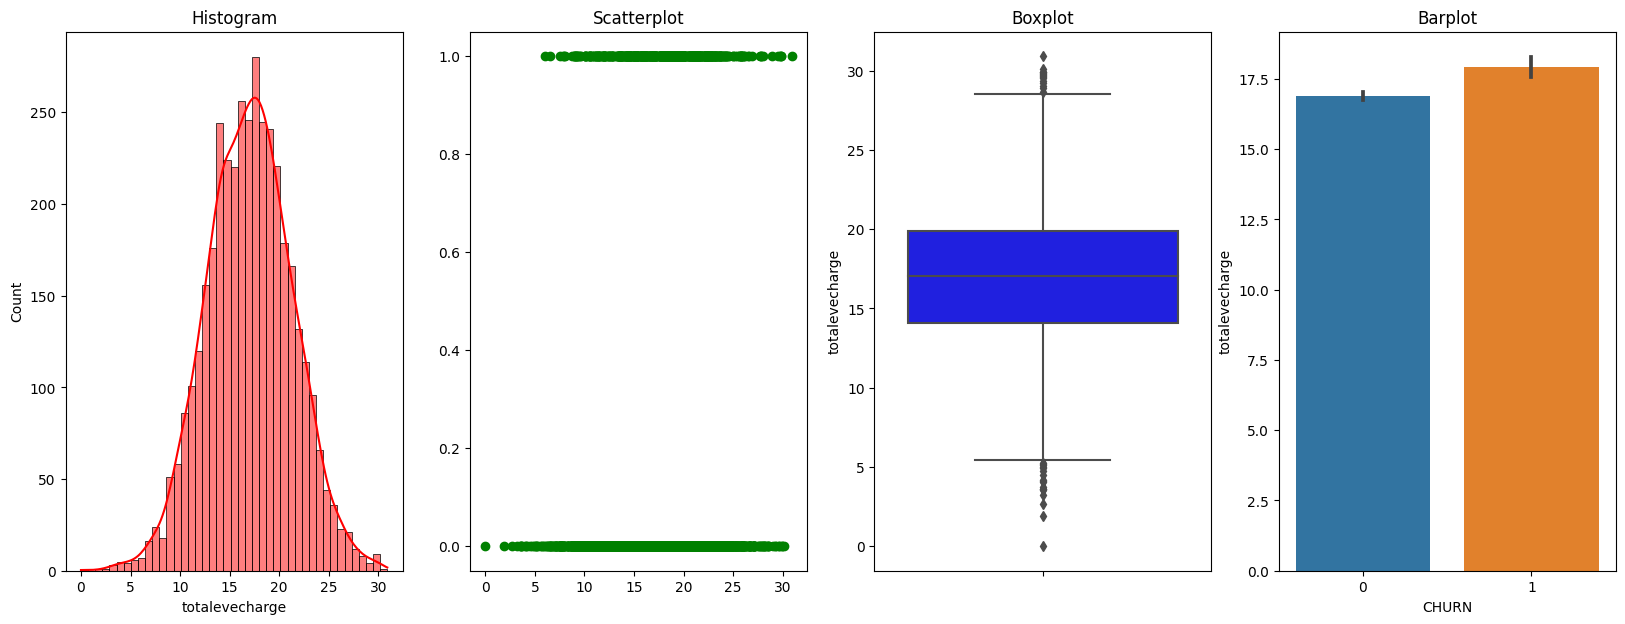

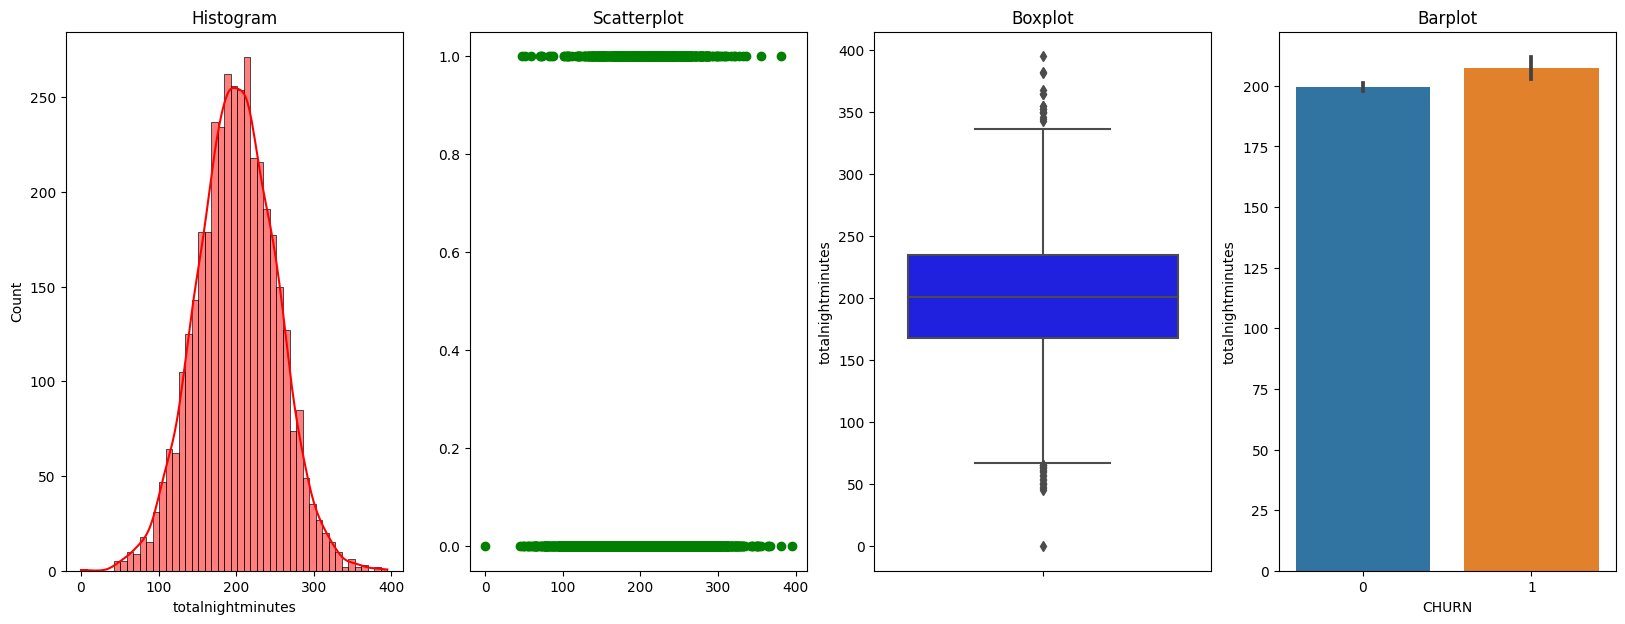

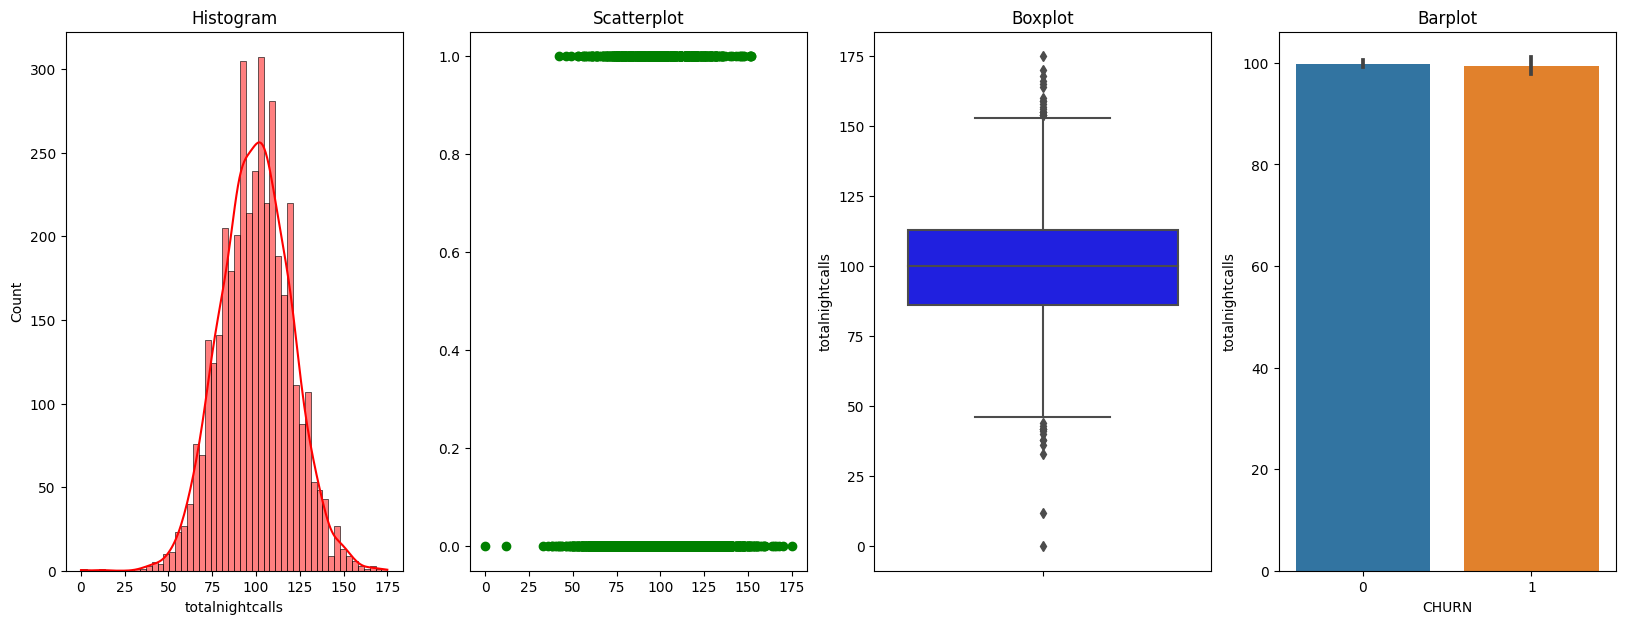

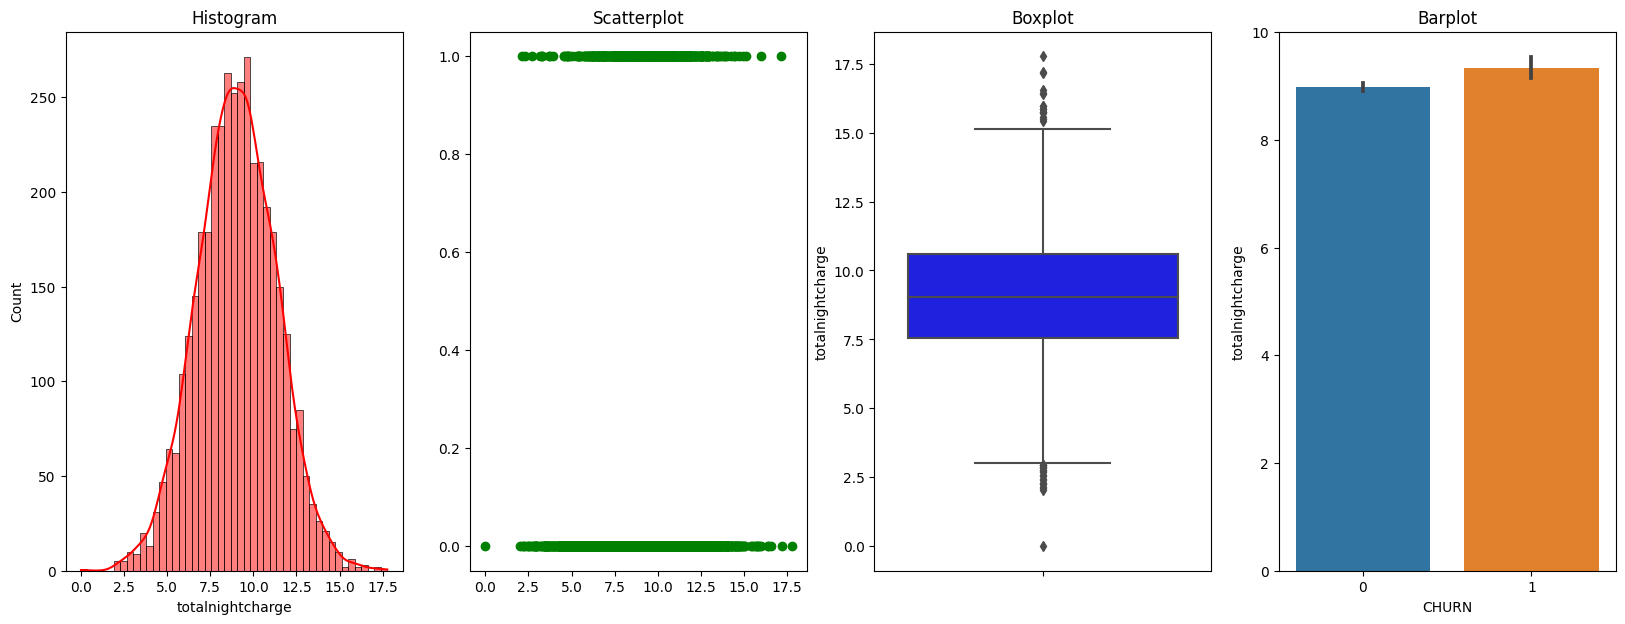

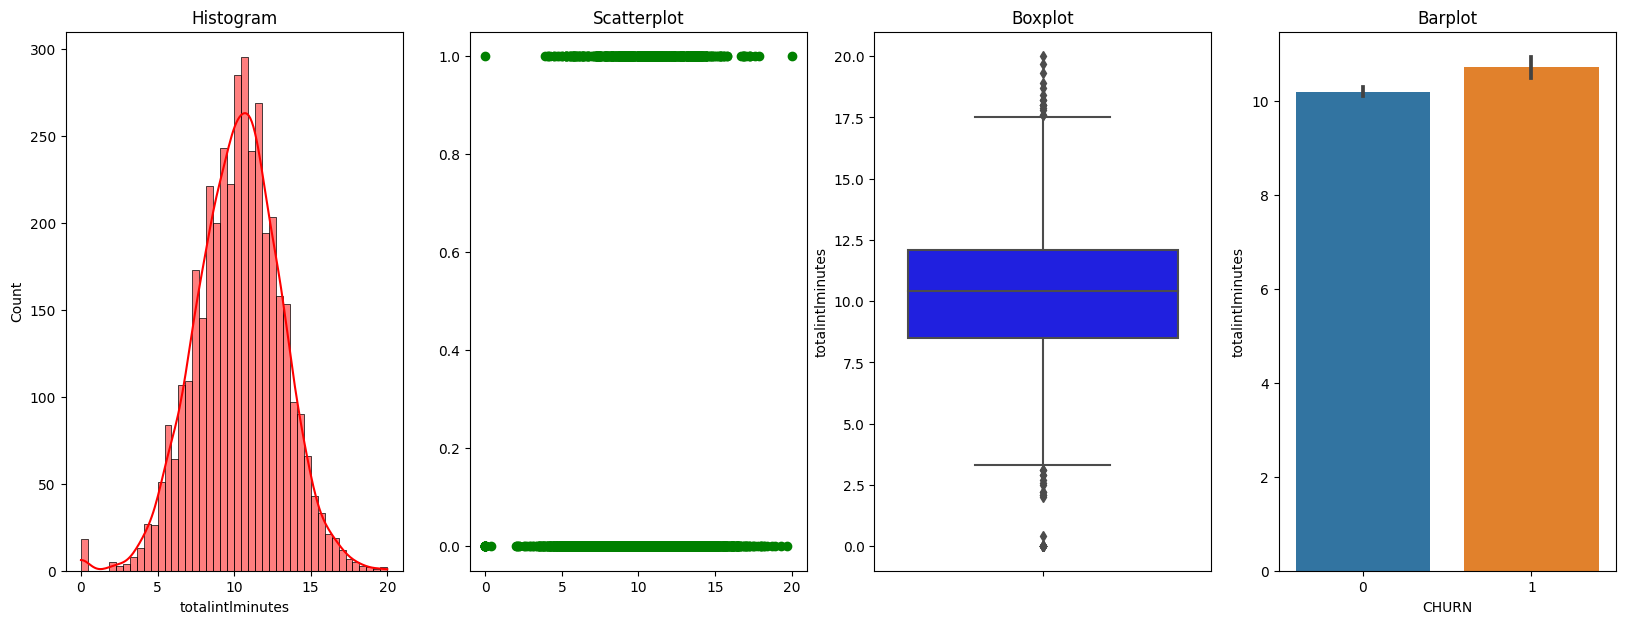

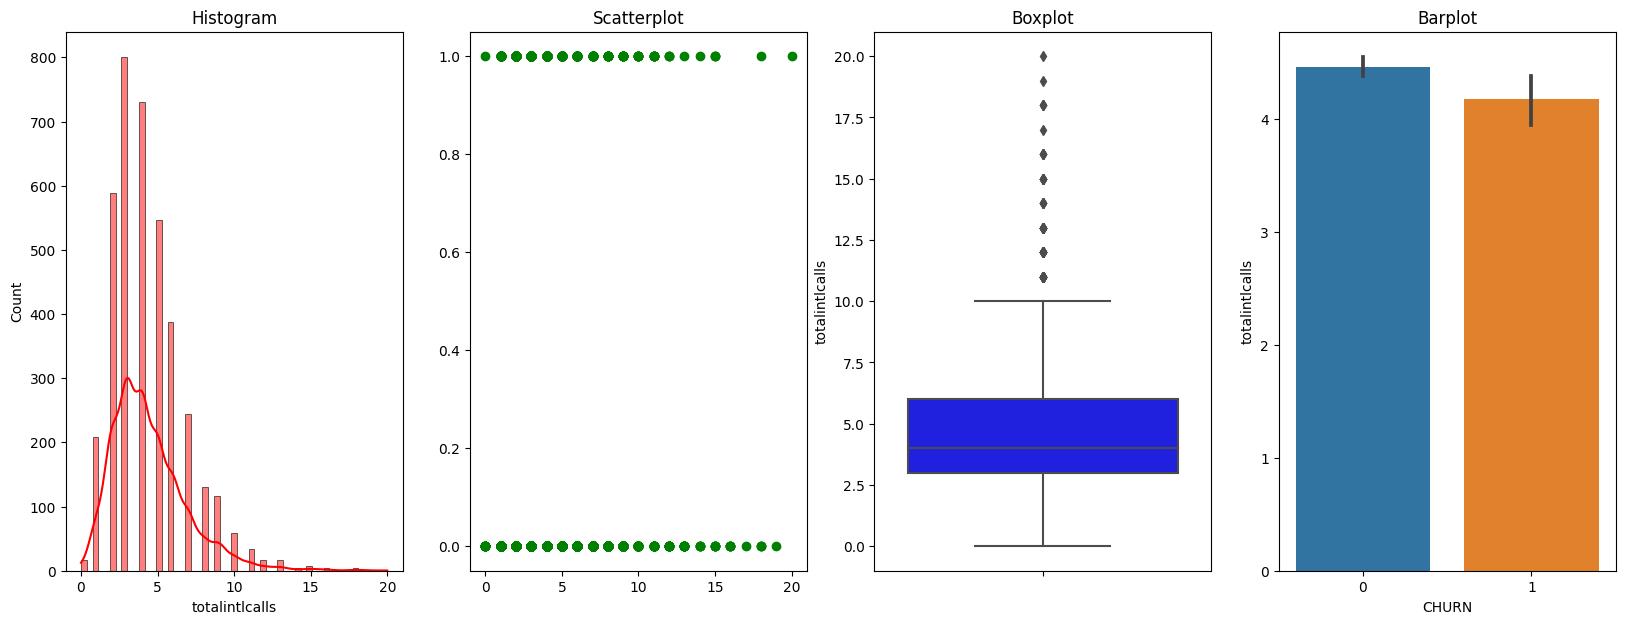

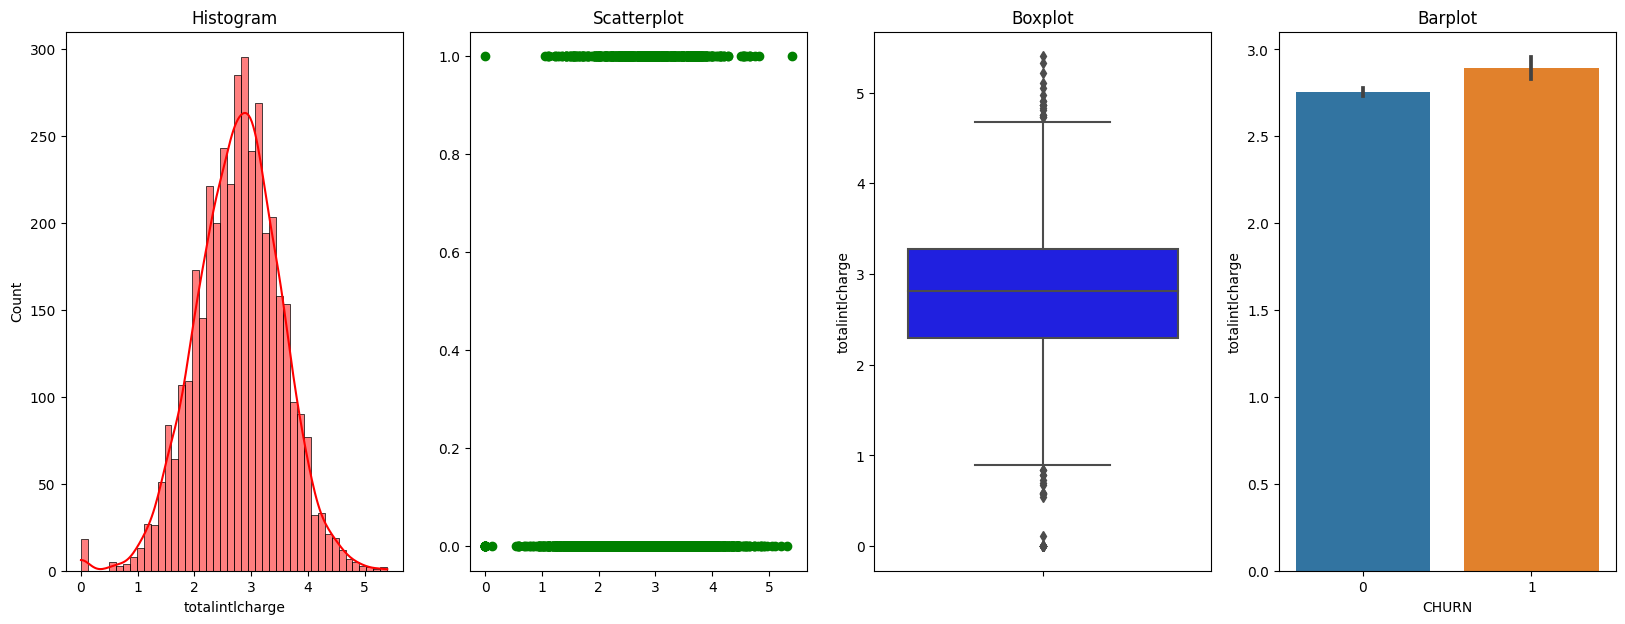

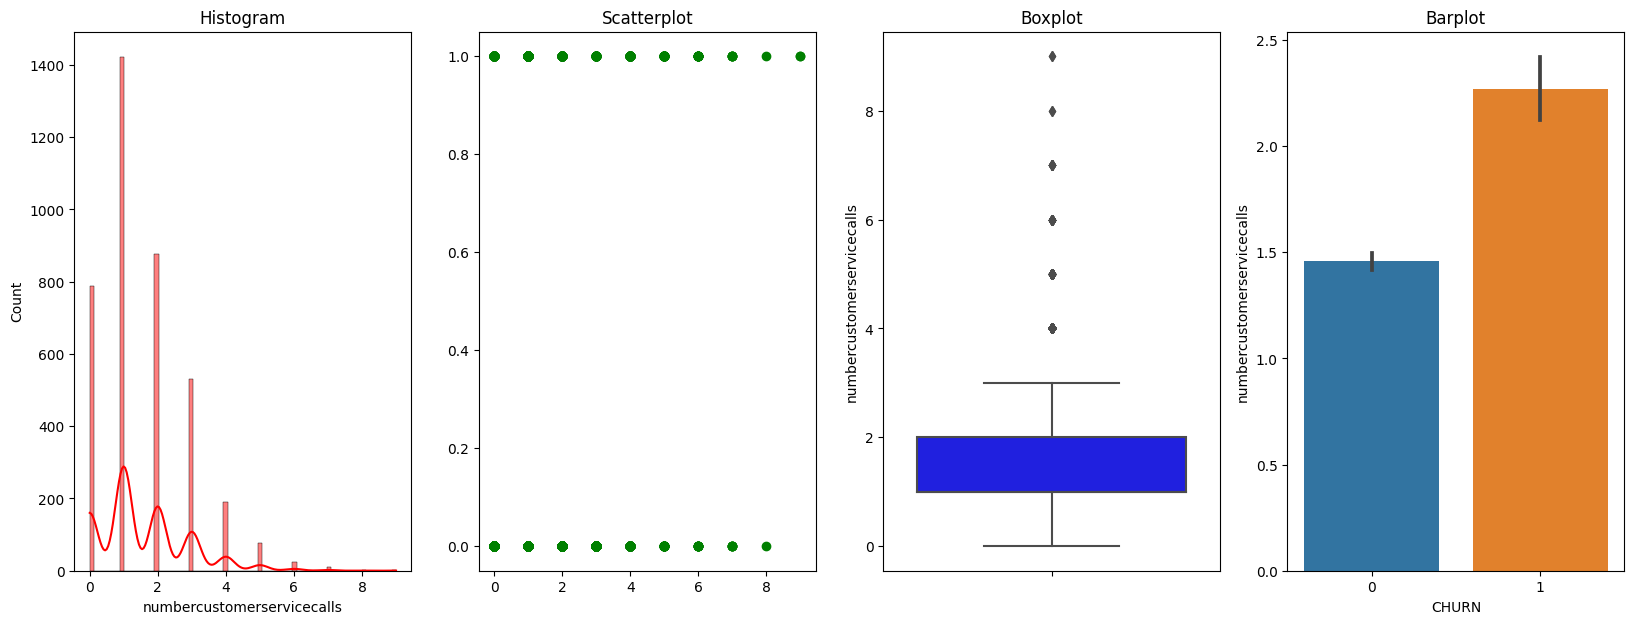

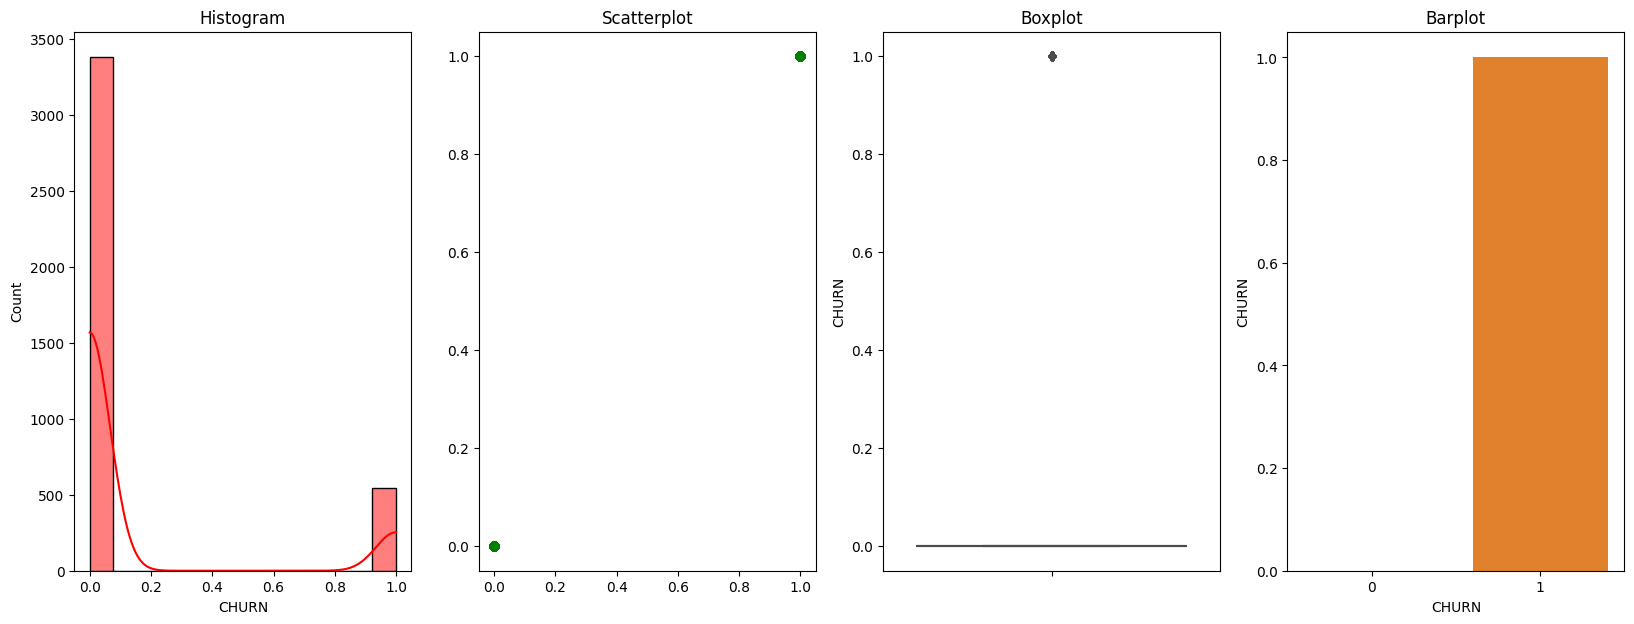

In [8]:
def diagnostic_plots(df, variable,target):

    plt.figure(figsize=(20, 7))

    plt.subplot(1, 4, 1)
    sbn.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    try:
        plt.subplot(1, 4, 3)
        sbn.boxplot(y=df[variable],color = 'b')
        plt.title('Boxplot')
    except Exception as ex:
        print(ex)

    plt.subplot(1, 4, 4)
    sbn.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    plt.show()
    
for item in dataset:
    diagnostic_plots(dataset,item,'CHURN')

In [9]:
dataset.corr()

,CAID,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,daycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,CHURN
CAID,1.000000,-0.010966,-0.012317,-0.041677,-0.040072,0.001826,-0.038998,0.001828,-0.015718,0.014470,-0.015713,-0.008136,-0.019358,-0.008128,0.004261,-0.041821,0.004258,0.017030,0.003005
accountlength,-0.010966,1.000000,0.013529,-0.009893,-0.016044,-0.002294,0.032181,-0.002300,-0.018489,0.006917,-0.018485,-0.007247,-0.013950,-0.007245,0.007976,0.026746,0.007968,-0.001199,0.011989
internationalplan,-0.012317,0.013529,1.000000,-0.002173,0.002549,0.033720,0.013395,0.033723,0.029140,0.017061,0.029139,-0.025662,0.005823,-0.025665,0.033216,0.010698,0.033140,-0.010688,0.271985
voicemailplan,-0.041677,-0.009893,-0.002173,1.000000,0.954960,0.016598,0.001577,0.016596,0.025137,0.000238,0.025147,0.019628,0.007343,0.019618,0.021743,-0.016967,0.021767,-0.008421,-0.102794
numbervmailmessages,-0.040072,-0.016044,0.002549,0.954960,1.000000,0.018223,0.006720,0.018220,0.023124,0.002371,0.023136,0.015786,-0.002800,0.015776,0.018567,-0.010667,0.018589,-0.004070,-0.090345
totaldayminutes,0.001826,-0.002294,0.033720,0.016598,0.018223,1.000000,0.009632,1.000000,-0.006207,0.007301,-0.006213,0.016496,-0.004671,0.016489,-0.029718,-0.003350,-0.029632,0.009544,0.190653
daycalls,-0.038998,0.032181,0.013395,0.001577,0.006720,0.009632,1.000000,0.009632,-0.012401,0.006660,-0.012397,0.015730,-0.014376,0.015721,0.009967,0.001231,0.010091,-0.008823,0.033776
totaldaycharge,0.001828,-0.002300,0.033723,0.016596,0.018220,1.000000,0.009632,1.000000,-0.006201,0.007303,-0.006207,0.016501,-0.004667,0.016494,-0.029719,-0.003348,-0.029633,0.009533,0.190647
totaleveminutes,-0.015718,-0.018489,0.029140,0.025137,0.023124,-0.006207,-0.012401,-0.006201,1.000000,0.005096,1.000000,-0.017594,-0.000770,-0.017599,-0.002886,0.007219,-0.002871,-0.013968,0.083482
totalevecalls,0.014470,0.006917,0.017061,0.000238,0.002371,0.007301,0.006660,0.007303,0.005096,1.000000,0.005108,-0.006528,-0.013319,-0.006508,-0.003234,0.007122,-0.003305,0.007537,-0.002436


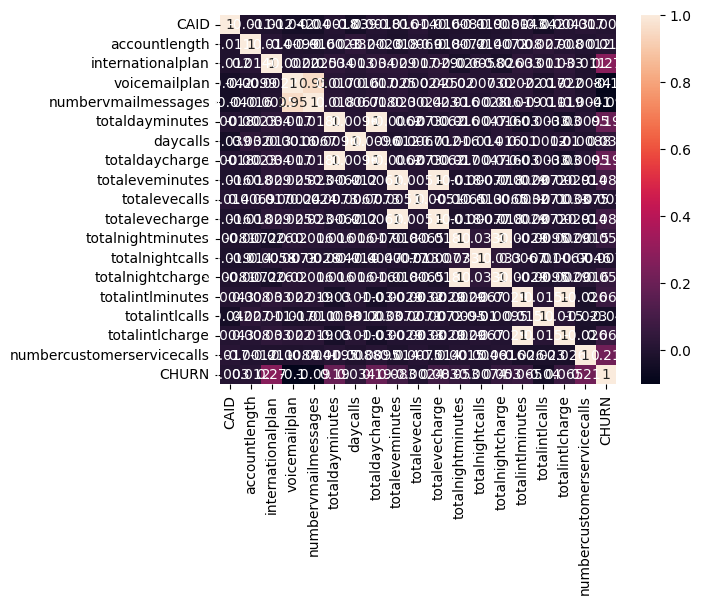

In [10]:
sbn.heatmap(dataset.corr(),annot=True)
plt.show()

In [11]:
features = dataset.drop("CHURN",axis=1)
label = dataset["CHURN"]

In [12]:
# scalling features dataset 
sc = StandardScaler()
features = sc.fit_transform(features)

In [13]:
xtrain , xtest , ytrain, ytest = train_test_split(features,label,random_state=42,shuffle=True)

the accuracy of the model is = 0.8970438328236493
the r2 score of model is = -0.6406855439642329


<Axes: >

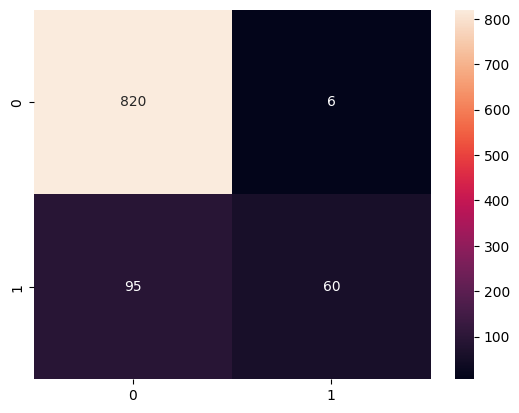

In [14]:

s_model = SVC()

s_model.fit(xtrain,ytrain)

pred = s_model.predict(xtest)

print(f"the accuracy of the model is = {s_model.score(xtest,ytest)}")

print(f"the r2 score of model is = {r2_score(pred,ytest)}")

cm = confusion_matrix(ytest,pred)

sbn.heatmap(cm,annot=True,fmt='g')

the accuracy of the model is = 0.9388379204892966
the r2 score of model is = 0.36007827788649704


<Axes: >

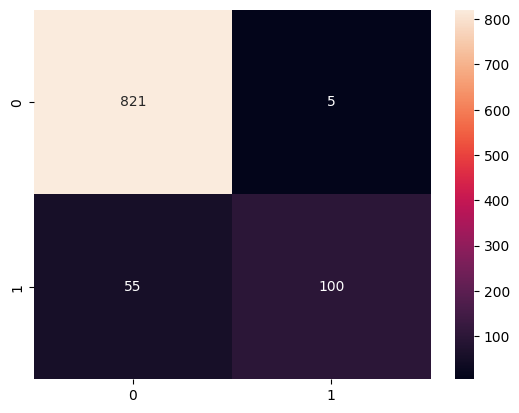

In [15]:

r_model = RandomForestClassifier()
r_model.fit(xtrain,ytrain)

pred = r_model.predict(xtest)

print(f"the accuracy of the model is = {r_model.score(xtest,ytest)}")

print(f"the r2 score of model is = {r2_score(pred,ytest)}")

cm = confusion_matrix(ytest,pred)

sbn.heatmap(cm,annot=True,fmt='g')


the accuracy of the model is = 0.9327217125382263
the r2 score of model is = 0.3076626959515816


<Axes: >

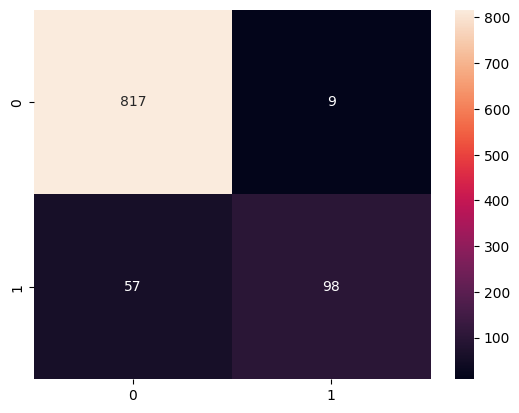

In [16]:
g_model = GradientBoostingClassifier()
g_model.fit(xtrain,ytrain)

pred = g_model.predict(xtest)

print(f"the accuracy of the model is = {g_model.score(xtest,ytest)}")

print(f"the r2 score of model is = {r2_score(pred,ytest)}")
cm = confusion_matrix(ytest,pred)
sbn.heatmap(cm,annot=True,fmt='g')


the accuracy of the model is = 0.854230377166157
the r2 score of model is = -2.132435691318327


<Axes: >

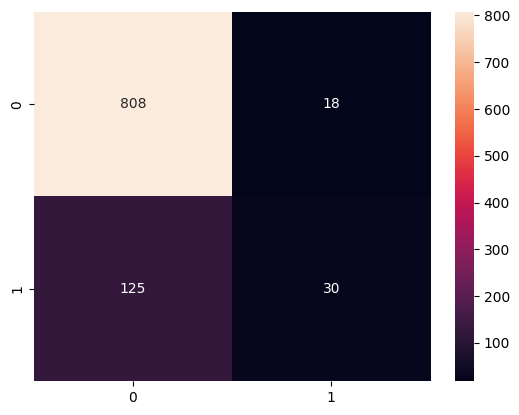

In [17]:
l_model = LogisticRegression(max_iter=1000)
l_model.fit(xtrain,ytrain)

pred = l_model.predict(xtest)

print(f"the accuracy of the model is = {l_model.score(xtest,ytest)}")

print(f"the r2 score of model is = {r2_score(pred,ytest)}")

cm = confusion_matrix(ytest,pred)

sbn.heatmap(cm,annot=True,fmt='g')


the accuracy of the model is = 0.8970438328236493
the r2 score of model is = 0.18726109424985649


<Axes: >

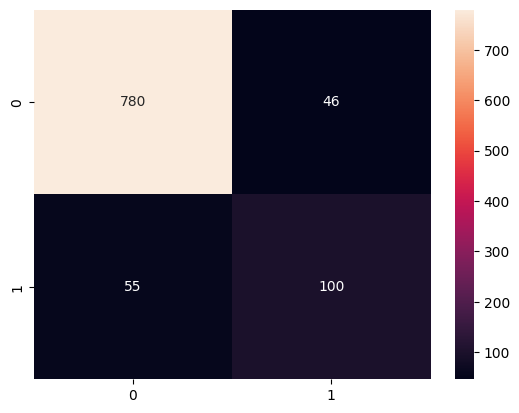

In [18]:
d_model = DecisionTreeClassifier()
d_model.fit(xtrain,ytrain)

pred = d_model.predict(xtest)

print(f"the accuracy of the model is = {d_model.score(xtest,ytest)}")

print(f"the r2 score of model is = {r2_score(pred,ytest)}")
cm = confusion_matrix(ytest,pred)
sbn.heatmap(cm,annot=True,fmt='g')


## test the data 

In [19]:
t_dataset = pd.read_csv("ChurnTestData.csv")
t_dataset.head(5)

,CAID,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,daycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,1,52,2,2,27,207.5,92,35.28,182.8,92,15.54,189.0,68,8.50,9.8,3,2.65,2
1,2,136,1,1,0,232.9,119,39.59,191.0,103,16.24,222.5,59,10.01,10.7,3,2.89,0
2,3,140,1,1,0,201.9,114,34.32,181.7,97,15.44,184.5,122,8.30,12.1,10,3.27,0
3,4,80,1,2,34,243.4,96,41.38,102.3,115,8.70,217.8,95,9.80,12.2,3,3.29,1
4,5,116,1,1,0,152.4,101,25.91,191.0,90,16.24,143.0,96,6.44,11.1,9,3.00,0


In [20]:
t_dataset = sc.fit_transform(t_dataset)

In [21]:
#logistic regresssion 
pred = l_model.predict(t_dataset)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
##s_model suport vector machine
pred = s_model.predict(t_dataset)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [23]:
#Random forest class
pred = r_model.predict(t_dataset)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [24]:
#GradientBoostingClassifier
pred = g_model.predict(t_dataset)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [25]:
#decision tree classf
pred = d_model.predict(t_dataset)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])